📌 Tujuan Latihan

Latihan ini bertujuan untuk memperkenalkan alur kerja Data Science melalui praktik nyata, mulai dari pembersihan data hingga membangun model prediksi harga rumah. Peserta akan memahami peran Data Engineer, Analyst, dan Scientist dalam mengelola dan menganalisis data.

📦 Deskripsi Dataset

Dataset berisi data properti (rumah) dengan informasi seperti:

Fitur numerik: Harga, Kamar Tidur, Luas Tanah, Luas Bangunan, Daya Listrik.

Fitur kategori: Kecamatan, Sertifikat, Kondisi Perabotan, dll.

Fitur kualitatif: Terjangkau Internet, Ruang Makan, Hook, dll.

Step 1: Membaca Data dari Google Drive

Mengambil dataset CSV langsung dari Google Drive tanpa perlu mount.

Menggunakan delimiter titik koma (;) karena format file tidak memakai koma.

Membersihkan nama kolom dari spasi yang tidak perlu.

Menampilkan 5 baris pertama untuk memahami struktur awal data.

In [1]:
# STEP 1: Baca File CSV Langsung dari Google Drive (tanpa mount drive)
import pandas as pd

# File dari Google Drive
file_id = "1nkrBFD-EJ_uoSPgtnhSgkSKA14NtQhSI"
file_url = f"https://drive.google.com/uc?id={file_id}"

# Baca file dengan delimiter titik koma
df_raw = pd.read_csv(file_url, delimiter=';', encoding='utf-8', on_bad_lines='skip')
df_raw.columns = df_raw.columns.str.strip()
df = df_raw.copy()

# Tampilkan 5 baris pertama
print("Preview 5 baris pertama data:")
display(df.head(5))

Preview 5 baris pertama data:


,Kecamatan,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Hadap,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti
0,wonokromo,600.000.000,3,2,45,70,SHM - Sertifikat Hak Milik,1300.0,Tidak,Tidak,Unfurnished,2.0,Barat,Tidak,NaN,NaN,Tidak,Baru
1,rungkut,600.000.000,3,2,48,2023,SHM - Sertifikat Hak Milik,1300.0,Ya,Ya,Unfurnished,2.0,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Baru
2,semampir,600.000.000,3,3,48,85,SHM - Sertifikat Hak Milik,1300.0,Ya,Ya,Unfurnished,3.0,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Bagus
3,pakal,600.000.000,2,1,50,91,HGB - Hak Guna Bangunan,1300.0,Ya,Ya,Unfurnished,1.0,Barat,Ya,2 Mobil,Sumur Pompa,Ya,Baru
4,gayungan,600.000.000,2,2,51,50,SHM - Sertifikat Hak Milik,2200.0,Tidak,Tidak,Unfurnished,NaN,NaN,Tidak,NaN,PAM atau PDAM,Tidak,Baru


Step 2: Data Engineer (Pembersihan & Persiapan)
Membersihkan nama kolom & menghapus baris dengan data penting yang kosong.

Konversi kolom numerik (harga, kamar, luas) ke tipe data numerik.

Rekayasa fitur:

- Rasio Bangunan/Tanah

- Kamar per Lantai

Hapus kembali baris yang masih mengandung nilai kosong.


In [2]:
# STEP 2 : --- DATA ENGINEER ---
import pandas as pd

# Strip kolom
df.columns = df.columns.str.strip()

# Hapus baris dengan data penting yang kosong
df = df.dropna(subset=['Price', 'Kamar Tidur', 'Kamar Mandi', 'Luas Tanah', 'Luas Bangunan'])

# Konversi numerik
df['Price'] = df['Price'].astype(str).str.replace('.', '', regex=False).astype(float)
df['Kamar Tidur'] = pd.to_numeric(df['Kamar Tidur'], errors='coerce')
df['Kamar Mandi'] = pd.to_numeric(df['Kamar Mandi'], errors='coerce')
df['Luas Tanah'] = pd.to_numeric(df['Luas Tanah'], errors='coerce')
df['Luas Bangunan'] = pd.to_numeric(df['Luas Bangunan'], errors='coerce')
df['Daya Listrik'] = pd.to_numeric(df['Daya Listrik'], errors='coerce')

# Rekayasa fitur tambahan
df['Rasio_Bangunan_Tanah'] = df['Luas Bangunan'] / df['Luas Tanah']
df['Kamar_per_Lantai'] = df['Kamar Tidur'] / df.get('Jumlah Lantai', df['Kamar Tidur'])

# Hapus NaN yang tersisa
df = df.dropna()

Step 3: Data Analyst (EDA)
Menganalisis statistik deskriptif untuk harga, kamar, dan luas tanah.

Visualisasi hubungan Luas Tanah vs Harga (scatter plot).

Melihat korelasi antar variabel numerik (heatmap).

Distribusi harga rumah (histogram + KDE) untuk cek pola sebaran dan outlier.


Statistik Deskriptif:
              Price  Kamar Tidur   Luas Tanah
count  2.540000e+03  2540.000000  2540.000000
mean   3.026120e+09     3.492913   166.903150
std    3.486679e+09     0.978877   126.791981
min    6.000000e+08     1.000000    45.000000
25%    1.420000e+09     3.000000    90.000000
50%    1.990000e+09     3.000000   120.000000
75%    3.200000e+09     4.000000   200.000000
max    4.200000e+10     7.000000  1000.000000


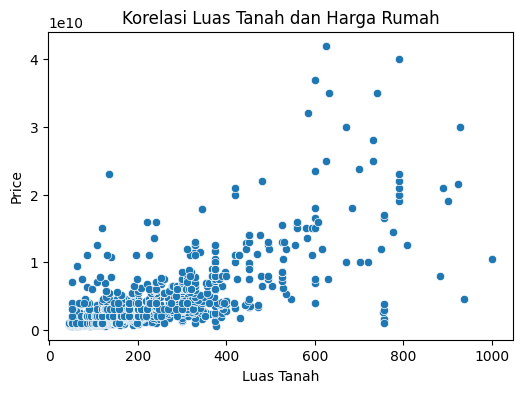

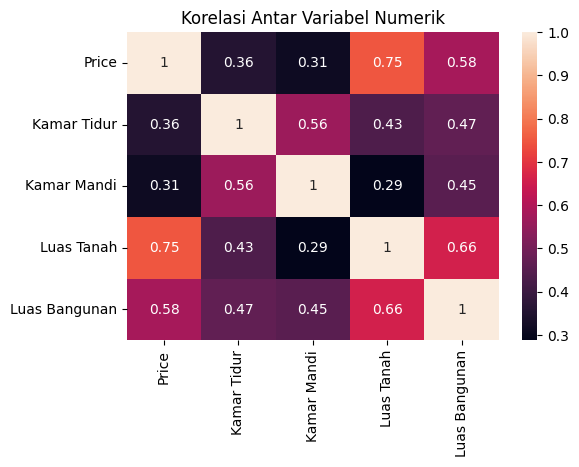

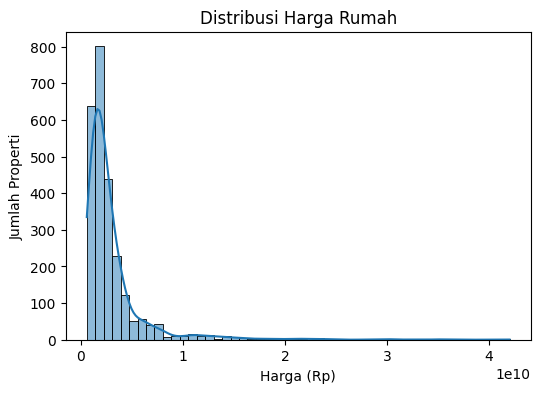

In [3]:
# STEP 3 : --- DATA ANALYST ---
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df[['Price', 'Kamar Tidur', 'Luas Tanah']].describe())

# Scatter plot Luas Tanah vs Harga
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Luas Tanah', y='Price')
plt.title('Korelasi Luas Tanah dan Harga Rumah')
plt.show()

# Heatmap korelasi numerik
plt.figure(figsize=(6,4))
sns.heatmap(df[['Price', 'Kamar Tidur', 'Kamar Mandi', 'Luas Tanah', 'Luas Bangunan']].corr(), annot=True)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

# Distribusi harga rumah
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga (Rp)')
plt.ylabel('Jumlah Properti')
plt.show()


Step 4: Data Scientist (Pemodelan)
Menentukan fitur penting dan melakukan one-hot encoding untuk kategori.

Membagi data menjadi train dan test (80:20).

Melakukan standardisasi agar model lebih stabil.

Melatih model Gradient Boosting untuk prediksi harga rumah.

Mengevaluasi akurasi dengan MAE dan menampilkan grafik prediksi vs aktual.


Mean Absolute Error (MAE): 648694009.88


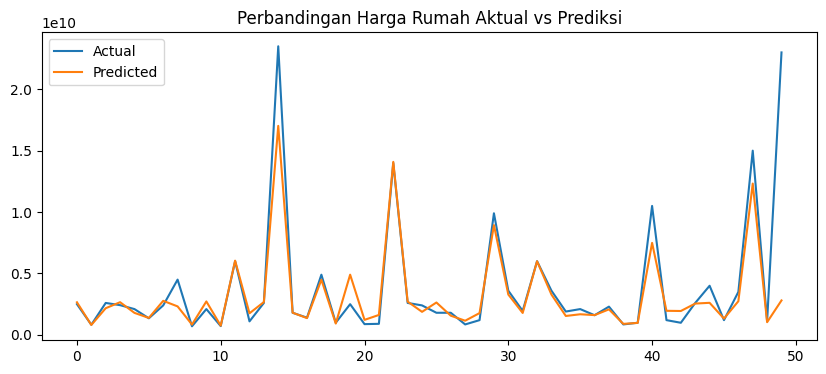

In [4]:
# STEP 4 : --- DATA SCIENTIST ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Fitur dan target
features = ['Kamar Tidur', 'Kamar Mandi', 'Luas Tanah', 'Luas Bangunan', 'Daya Listrik',
            'Rasio_Bangunan_Tanah', 'Kamar_per_Lantai', 'Kecamatan', 'Sertifikat']
df_model = pd.get_dummies(df[features], drop_first=True)

X = df_model
y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Gradient Boosting
model = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluasi
mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error (MAE):", round(mae, 2))

# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10,4))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.title("Perbandingan Harga Rumah Aktual vs Prediksi")
plt.legend()
plt.show()